## Lecture 1.4: A Basic Statistical Model in PyTorch

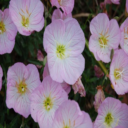

In [7]:
import torchvision
import torch
from PIL import Image

## Create a vector of zeros of size 5

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1,2,0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[0][0])

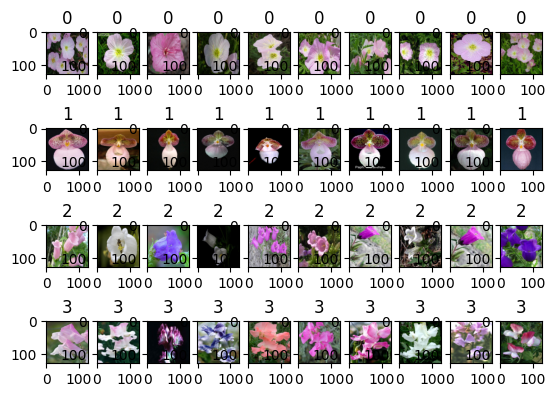

In [2]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10)
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)
# plt.imshow(visualize_image(train_dataset[1][0]))

class_01 = list(train_dataset)[:20]
# class_1 = list(train_dataset)[10:20]

## Nearest Neighbor Classifier

$f : \mathbb{R} \rightarrow \{0,\ 1\}$

* Input $x$
* Find *closest* data point $(\tilde{x},\ l)\ \in\ \mathcal{D}$ in dataset $\mathcal{D}$
* Return its label $l$

In [3]:
def nn_classifier(x):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    # print(dist)
    # print(min(dist))
    # print(min(dist)[0])
    return min(dist)[1]

nn_classifier(test_dataset[0][0])
accuracy = sum(nn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20

In [8]:
# print(accuracy)
[l for _, l in list(test_dataset)[:20]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## K Nearest Neighbor Classifier

$f : \mathbb{R} \rightarrow \{0,\ 1\}$

* Input $x$
* Find k *closest* data points in dataset $\mathcal{D}$
* Return most common label

In [17]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    # print(k_closest)
    # print(k_closest, sorted(k_closest)[k//2])
    return sorted(k_closest)[k//2]

knn_classifier(test_dataset[3][0])
accuracy = sum(knn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
print(accuracy)


0.5


## K Nearest Neighbor Regression

$f\ : \mathbb{R} \rightarrow \mathbb{R}$

* Input $x$
* Find k *closest* data points in dataset $\mathcal{D}$
* Return average value

In [18]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())

knn_regression(test_dataset[3][0])

tensor(0.6667)